## Data and Package Import

In [1]:
from ipynb.fs.full.myFunctions import *   

#error handling
warnings.filterwarnings('ignore')

In [7]:
#insert file path below
file_location=r'C:\Users\csmov\05132021 in vitro training data\FullMasterPulse 06022021.xlsx' #location of Excel sheet
#file_location=r'C:\Users\csmov\05132021 in vitro training data\05172021_55_bare\06022021\MasterPulse.xlsx'
sheetName = 'NBS NA PulseCut' #sheet where data is located

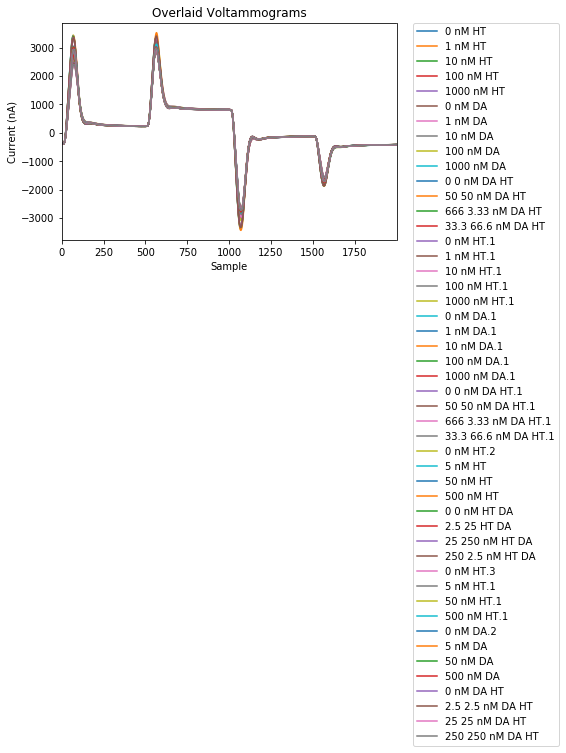

In [8]:
#import data
df_RPV = pd.read_excel(file_location, sheet_name=sheetName) #dataframe for voltammogram response

df_RPV_T = df_RPV.T #transpose to get in correct format for sklearn
df_ConcAll = pd.read_excel(file_location, sheet_name = 'Conc') #dataframe for concentrations of df_RPV responses
df_Samples = pd.DataFrame((list(df_RPV.columns)),columns=['Sample']) #extracts sample code

df_RPV.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Sample");
plt.ylabel("Current (nA)");
plt.title("Overlaid Voltammograms");

In [4]:
print(df_Samples.to_string())

                  Sample
0               0 nM 5HT
1               1 nM 5HT
2              10 nM 5HT
3             100 nM 5HT
4               1 uM 5HT
5                0 nM DA
6                1 nM DA
7               10 nM DA
8              100 nM DA
9             1000 nM DA
10          0 0 nM DA HT
11        50 50 nM DA HT
12     666 3.33 nM DA HT
13    33.3 66.6 nM DA HT
14               0 nM HT
15               1 nM HT
16              10 nM HT
17             100 nM HT
18            1000 nM HT
19             0 nM DA.1
20             1 nM DA.1
21            10 nM DA.1
22           100 nM DA.1
23          1000 nM DA.1
24        0 0 nM DA HT.1
25      50 50 nM DA HT.1
26  33.3 66.6 nM DA HT.1
27   666 3.33 nM DA HT.1
28             0 nM HT.1
29               5 nM HT
30              50 nM HT
31             500 nM HT
32             0 nM DA.2
33               5 nM DA
34              50 nM DA
35             500 nM DA
36          0 0 nM HT DA
37       2.5 25 nM HT DA
38       25 250 nM HT DA


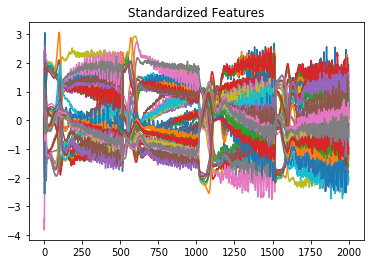

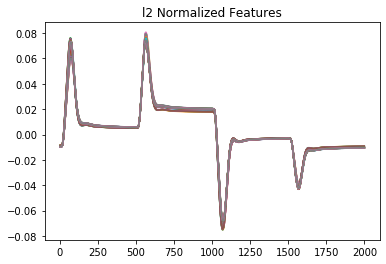

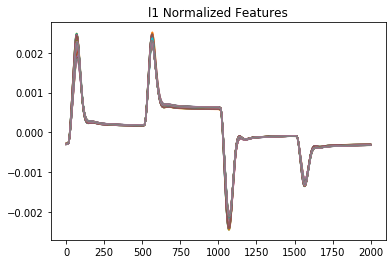

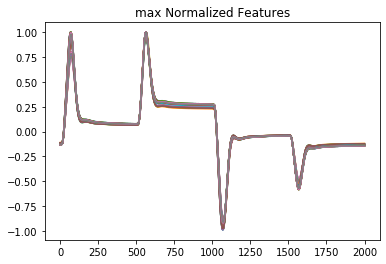

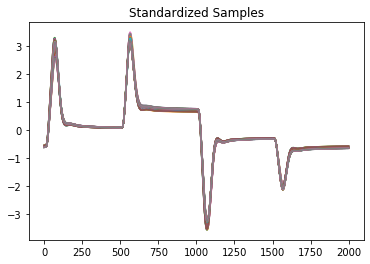

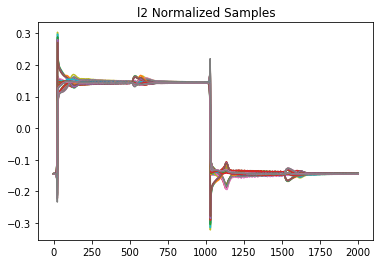

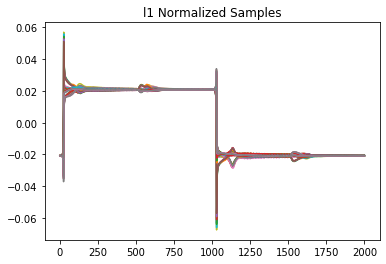

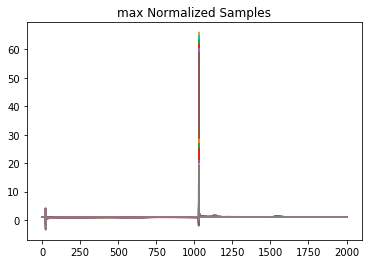

In [9]:
plt.plot((preprocessing.StandardScaler().fit_transform(df_RPV_T)).T);
plt.title("Standardized Features")
plt.show()

for myNorm in ['l2','l1','max']:
    plt.plot((preprocessing.Normalizer(norm=myNorm).fit_transform(df_RPV_T)).T);
    plt.title(myNorm+' Normalized Features')
    plt.show()
    
plt.plot((preprocessing.StandardScaler().fit_transform(df_RPV)));
plt.title("Standardized Samples")
plt.show()

for myNorm in ['l2','l1','max']:
    plt.plot((preprocessing.Normalizer(norm=myNorm).fit_transform(df_RPV)));
    plt.title(myNorm+' Normalized Samples')
    plt.show()

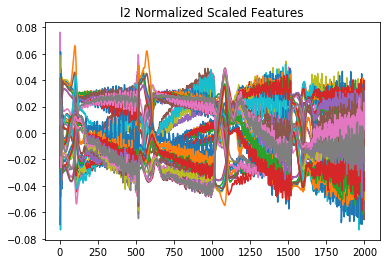

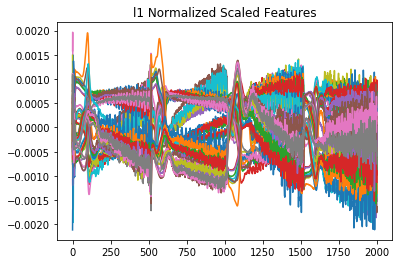

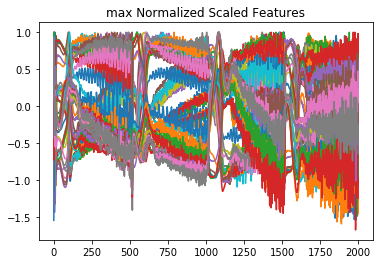

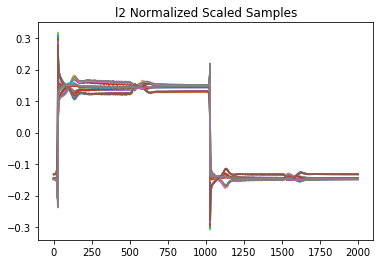

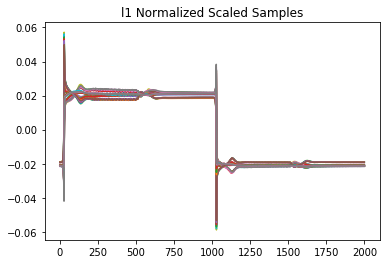

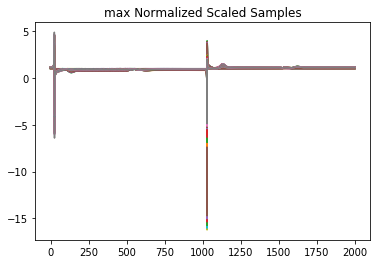

In [10]:
for myNorm in ['l2','l1','max']:
    plt.plot((preprocessing.Normalizer(norm=myNorm).fit_transform(scale(df_RPV_T)).T));
    plt.title(myNorm+' Normalized Scaled Features')
    plt.show()

for myNorm in ['l2','l1','max']:
    plt.plot((preprocessing.Normalizer(norm=myNorm).fit_transform(scale(df_RPV))));
    plt.title(myNorm+' Normalized Scaled Samples')
    plt.show()

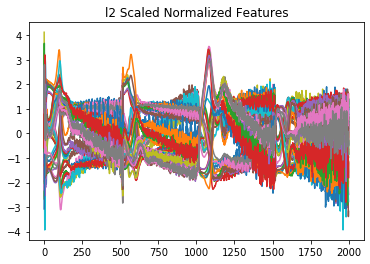

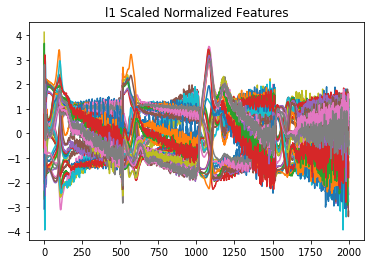

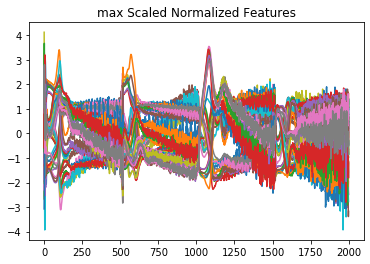

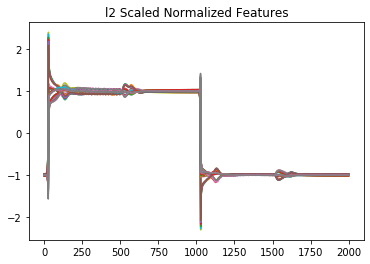

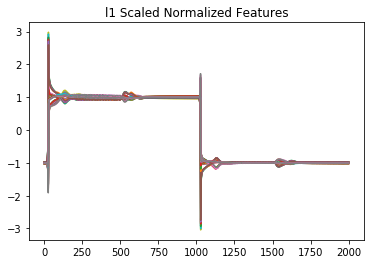

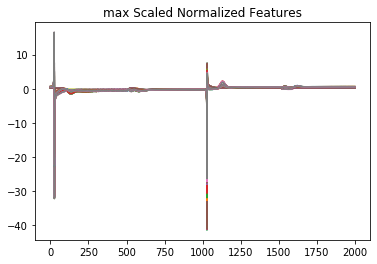

In [13]:
for myNorm in ['l2','l1','max']:
    plt.plot(preprocessing.StandardScaler().fit_transform(
        (preprocessing.Normalizer(norm=myNorm).fit_transform(scale(df_RPV_T)).T)));
    plt.title(myNorm+' Scaled Normalized Features')
    plt.show()
    
for myNorm in ['l2','l1','max']:
    plt.plot(preprocessing.StandardScaler().fit_transform(
        (preprocessing.Normalizer(norm=myNorm).fit_transform(scale(df_RPV)))));
    plt.title(myNorm+' Scaled Normalized Features')
    plt.show()
    

In [45]:
### electrode colormap

cmap_electrode = {'0 nM 5HT':'r',
 '1 nM 5HT':'r',
 '10 nM 5HT':'r',
 '100 nM 5HT':'r',
 '1 uM 5HT':'r',
 '0 nM DA':'r',
 '1 nM DA':'r',
 '10 nM DA':'r',                 
 '100 nM DA':'r',
 '1000 nM DA':'r',
 '0 0 nM DA HT':'r',
 '50 50 nM DA HT':'r',
 '666 3.33 nM DA HT':'r',
 '33.3 66.6 nM DA HT':'r',
 '0 nM HT':'b',
 '1 nM HT':'b',
 '10 nM HT':'b',
 '100 nM HT':'b',
 '1000 nM HT':'b',
 '0 nM DA.1':'b',
 '1 nM DA.1':'b',
 '10 nM DA.1':'b',
 '100 nM DA.1':'b',
 '1000 nM DA.1':'b',
 '0 0 nM DA HT.1':'b',
 '50 50 nM DA HT.1':'b',
 '666 3.33 nM DA HT.1':'b',
 '33.3 66.6 nM DA HT.1':'b',
 '0 nM HT.1':'g',
 '5 nM HT':'g',
 '50 nM HT':'g',
 '500 nM HT':'g',
 '0 0 nM HT DA':'g',
 '2.5 25 nM HT DA':'g',
 '25 250 nM HT DA':'g',
 '250 2.5 nM HT DA':'g',
 '0 nM DA.3':'k',
 '5 nM DA.1':'k',
 '50 nM DA.1':'k',
 '500 nM DA.1':'k',
 '0 nM HT.2':'k',
 '5 nM HT.1':'k',
 '50 nM HT.1':'k',
 '500 nM HT.1':'k',
 '0 nM DA.2':'k',
 '5 nM DA':'k',
 '50 nM DA':'k',
 '500 nM DA':'k',
 '0 0 nM DA HT.2':'k',
 '2.5 2.5 nM DA HT':'k',
 '25 25 nM DA HT':'k',
 '250 250 nM DA HT':'k'}

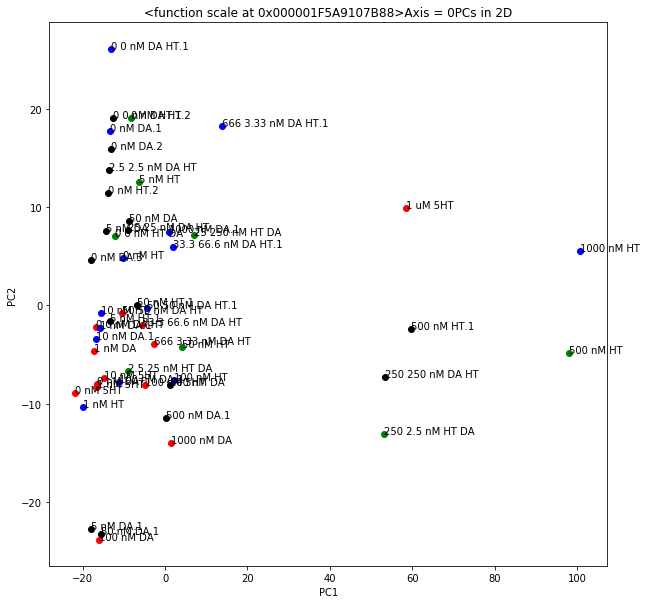

[0.76719739 0.12384744]
PC1 % Explained Variance: 76.72 
PC2 % Explained Variance: 12.38


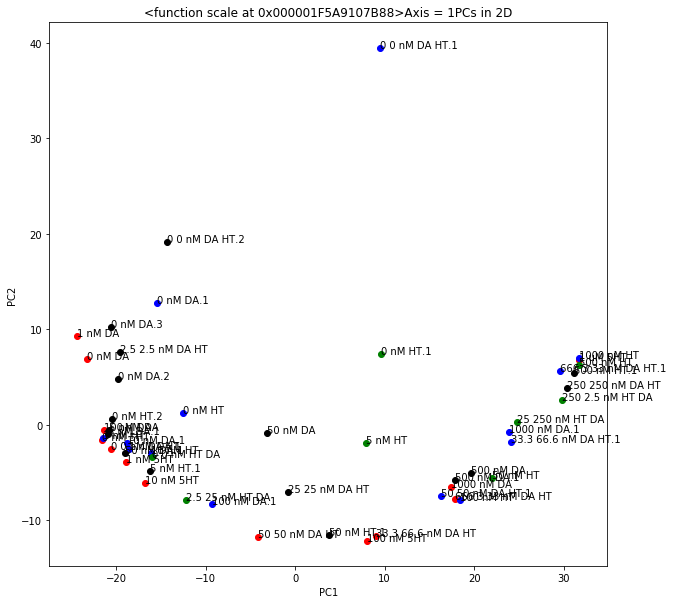

[0.63563039 0.122377  ]
PC1 % Explained Variance: 63.56 
PC2 % Explained Variance: 12.24


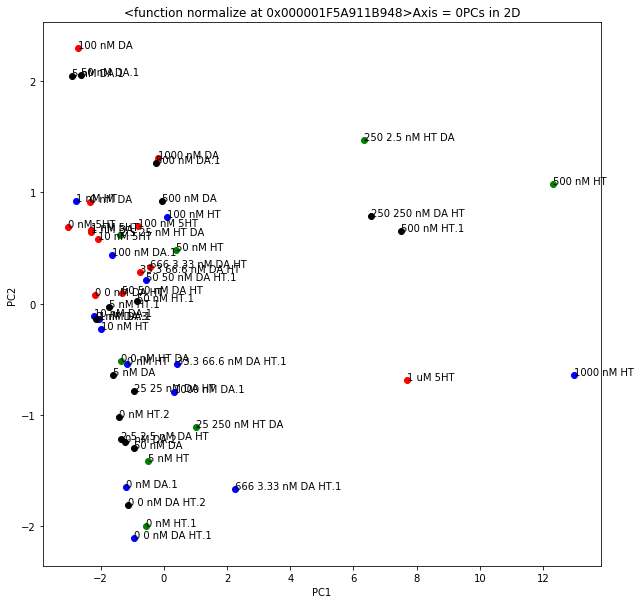

[0.82881953 0.07484505]
PC1 % Explained Variance: 82.88 
PC2 % Explained Variance: 7.48


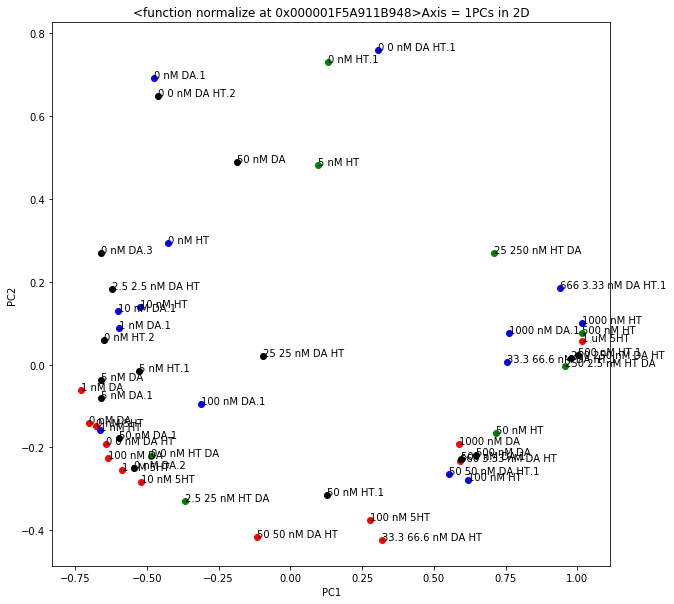

[0.62005959 0.1353166 ]
PC1 % Explained Variance: 62.01 
PC2 % Explained Variance: 13.53


In [46]:
#PCA of X
#ignore warnings; may need to update get_value in future.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pca = PCA(n_components = 2) 

for preProcess in [scale,normalize]:
    for myAxis in [0,1]:
        principalComponents = pca.fit_transform(preProcess(df_RPV_T,axis=myAxis))
        principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
        finalDf = pd.concat([principalDf, df_Samples], axis = 1)

        # plot and label the data in PC space
        plt.figure(figsize=(10,10))
        for i in range(len(df_Samples)):
            plt.scatter(finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2'),color=cmap_electrode[finalDf.get_value(i,"Sample")])
            plt.annotate(finalDf.get_value(i,"Sample"), (finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2')))
        #plt.plot([-1,0,1],[0,0,0],c='k')
        #plt.plot([0,0,0],[-1,0,1],c='k')
        
        plt.title(str(preProcess) + 'Axis = '+ str(myAxis) + "PCs in 2D")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()

        print(pca.explained_variance_ratio_)
        print("PC1 % Explained Variance:",round(pca.explained_variance_ratio_[0]*100,2), "\nPC2 % Explained Variance:", round(pca.explained_variance_ratio_[1]*100,2))


## Preprocessing and Outlier Removal

In [19]:
removeIndex = 7 #insert index of samples to remove
removeColumns = '10 nM DA' #insert name of samples to remove

try:
    df_ConcAll=df_ConcAll.drop(index=removeIndex)
    df_RPV = df_RPV.drop(columns=removeColumns)
    
except:
    print("Could not find samples listed.")

finally:
    df_RPV_T=df_RPV.T
    df_Samples = pd.DataFrame((list(df_RPV.columns)),columns=['Sample']) #extracts sample code
    list_Samples = df_Samples.values.tolist();

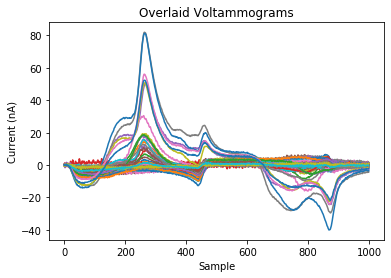

In [20]:
df_ConcDA = df_ConcAll[["DA"]] # contains only dopamine (DA) concentrations
df_ConcHT = df_ConcAll[["HT"]] # contains only serotonin (5HT) concentrations
df_Samples = pd.DataFrame((list(df_RPV.columns)),columns=['Sample']) #extracts sample code

X = df_RPV_T.to_numpy();
X_raw = df_RPV_T.to_numpy();
y = df_ConcAll.to_numpy();
y_DA = df_ConcAll['DA'].to_numpy();
y_5HT = df_ConcAll['HT'].to_numpy();

list_Samples = df_Samples.values.tolist();

plt.plot(X.T);
plt.xlabel("Sample");
plt.ylabel("Current (nA)");
plt.title("Overlaid Voltammograms");

## Signal Processing

### Baseline Correction
by assymetric least squares; see https://stackoverflow.com/questions/29156532/python-baseline-correction-library

In [ ]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

#set lam b/t 100 to 10^9 and p b/t 0.001 and 0.1

X_raw_bline = np.zeros(np.shape(X.T))
for i in range(len(X)):
    bline=baseline_als(X_raw.T[:,i],100000,0.1)
    X_raw_bline[:,i]=(X_raw.T)[:,i]-bline
    plt.plot(X_raw_bline,label=i)
    plt.legend()
    plt.show

In [21]:
#Hyperparameters
nComponents = 3

#Preprocessing
#preProcess = 'Normalize' #'No Scale', 'Scale Features', 'Scale Samples', or 'Normalize'
#myNorm = 'l2' #'max', 'l2' or 'l1'

#Cross-validation
cvFolds = 5

#Model
modelChoice = 'PLSR' #'PLSR', 'PCR'

In [22]:

#preprocess
for preProcess in ['No Scale','Scale Features', 'Scale Samples', 'Normalize']:
    if preProcess == 'Scale Features':
        preProcesser_ScaleFeatures = preprocessing.StandardScaler().fit(X) 

    if preProcess == 'Normalize':
        for myNorm in ['l1','l2','max']:
            if myNorm == 'l1': 
                preProcesser_l1_Normalize = preprocessing.Normalizer(norm=myNorm).fit(X) 
            if myNorm == 'l2': 
                preProcesser_l2_Normalize = preprocessing.Normalizer(norm=myNorm).fit(X) 
            if myNorm == 'max': 
                preProcesser_max_Normalize = preprocessing.Normalizer(norm=myNorm).fit(X) 

    if preProcess == 'No Scale':
        preProcesser_NoScale = preprocessing.StandardScaler(with_mean=False,with_std=False).fit(X) 

    if preProcess == 'Scale Samples':
        preProcesser_ScaleSamples = preprocessing.StandardScaler().fit(X.T)



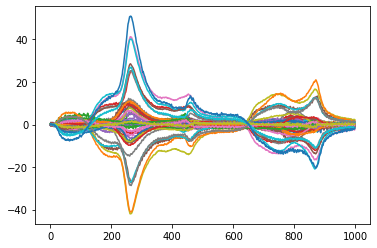

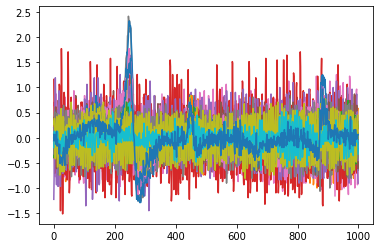

In [23]:
gradients_1 = np.gradient(X.T,axis=1)

plt.plot(gradients_1);
plt.show()

gradients_0 = np.gradient(X.T,axis=0)

plt.plot(gradients_0);
plt.show()


In [24]:
list(df_RPV.columns)

['0 nM 5HT',
 '1 nM 5HT',
 '10 nM 5HT',
 '100 nM 5HT',
 '1 uM 5HT',
 '0 nM DA',
 '1 nM DA',
 '100 nM DA',
 '1000 nM DA',
 '0 0 nM DA HT',
 '50 50 nM DA HT',
 '666 3.33 nM DA HT',
 '33.3 66.6 nM DA HT',
 '0 nM HT',
 '1 nM HT',
 '10 nM HT',
 '100 nM HT',
 '1000 nM HT',
 '0 nM DA.1',
 '1 nM DA.1',
 '10 nM DA.1',
 '100 nM DA.1',
 '1000 nM DA.1',
 '0 0 nM DA HT.1',
 '50 50 nM DA HT.1',
 '33.3 66.6 nM DA HT.1',
 '666 3.33 nM DA HT.1',
 '0 nM HT.1',
 '5 nM HT',
 '50 nM HT',
 '500 nM HT',
 '0 nM DA.2',
 '5 nM DA',
 '50 nM DA',
 '500 nM DA',
 '0 0 nM HT DA',
 '2.5 25 nM HT DA',
 '25 250 nM HT DA',
 '250 2.5 nM HT DA',
 '0 nM DA.3',
 '5 nM DA.1',
 '50 nM DA.1',
 '500 nM DA.1',
 '0 nM HT.2',
 '5 nM HT.1',
 '50 nM HT.1',
 '500 nM HT.1',
 '0 0 nM DA HT.2',
 '2.5 2.5 nM DA HT',
 '25 25 nM DA HT',
 '250 250 nM DA HT']

In [25]:
#electrode colormap

cmap_electrode = {'0 nM HT':'r',
 '1 nM HT':'r',
 '10 nM HT':'r',
 '100 nM HT':'r',
 '1000 nM HT':'r',
 '0 nM DA':'r',
 '1 nM DA':'r',
 '10 nM DA':'r',                 
 '100 nM DA':'r',
 '1000 nM DA':'r',
 '0 0 nM DA HT':'r',
 '50 50 nM DA HT':'r',
 '666 3.33 nM DA HT':'r',
 '33.3 66.6 nM DA HT':'r',
 '0 nM HT.1':'b',
 '1 nM HT.1':'b',
 '10 nM HT.1':'b',
 '100 nM HT.1':'b',
 '1000 nM HT.1':'b',
 '0 nM DA.1':'b',
 '1 nM DA.1':'b',
 '10 nM DA.1':'b',
 '100 nM DA.1':'b',
 '1000 nM DA.1':'b',
 '0 0 nM DA HT.1':'b',
 '50 50 nM DA HT.1':'b',
 '666 3.33 nM DA HT.1':'b',
 '33.3 66.6 nM DA HT.1':'b',
 '0 nM HT.2':'g',
 '5 nM HT':'g',
 '50 nM HT':'g',
 '500 nM HT':'g',
 '0 0 nM HT DA':'g',
 '2.5 25 nM HT DA':'g',
 '25 250 nM HT DA':'g',
 '250 2.5 nM HT DA':'g',
 '0 nM HT.3':'k',
 '5 nM HT.1':'k',
 '50 nM HT.1':'k',
 '500 nM HT.1':'k',
 '0 nM DA.2':'k',
 '5 nM DA':'k',
 '50 nM DA':'k',
 '500 nM DA':'k',
 '0 nM DA HT ':'k',
 '2.5 2.5 nM DA HT':'k',
 '25 25 nM DA HT':'k',
 '250 250 nM DA HT':'k'}

In [26]:
assert(len(cmap_electrode)==len(list(df_RPV.columns)))

AssertionError: 

KeyError: '2.5 25 nM HT DA'

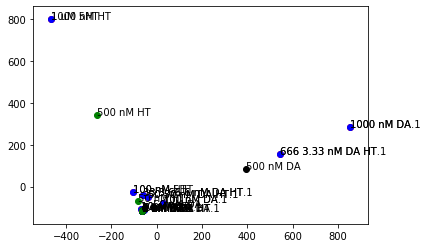

In [30]:
#PCA of Y
#ignore warnings; may need to update get_value in future.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(y)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_Samples], axis = 1)

# plot and label the data in PC space
for i in range(len(df_Samples)):
    plt.scatter(finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2'),color=cmap_electrode[finalDf.get_value(i,"Sample")])
    plt.annotate(finalDf.get_value(i,"Sample"), (finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2')))
plt.plot([-5,0,5],[0,0,0],c='k')
plt.plot([0,0,0],[-3,0,3],c='k')
plt.title("PCs in 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

print("PC1 % Explained Variance:", round(pca.explained_variance_ratio_[0]*100,2), "\nPC2 % Explained Variance:", round(pca.explained_variance_ratio_[1]*100,2))

KeyError: '2.5 25 nM HT DA'

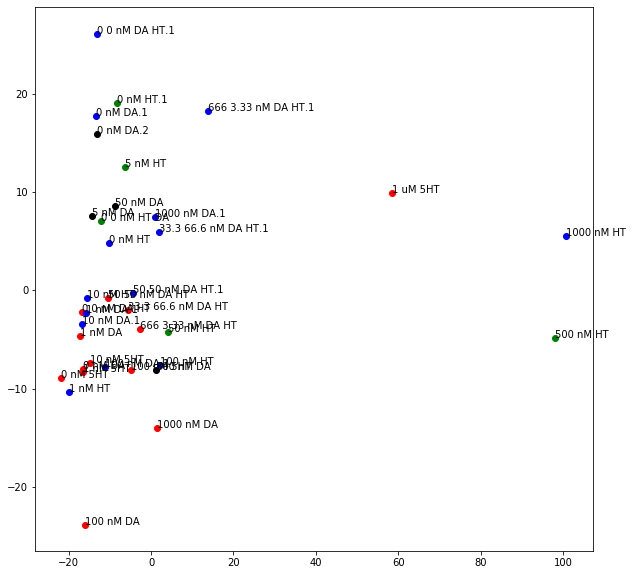

In [29]:
#PCA of X
#ignore warnings; may need to update get_value in future.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pca = PCA(n_components = 2) 
principalComponents = pca.fit_transform(scale(X_raw))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_Samples], axis = 1)

# plot and label the data in PC space
plt.figure(figsize=(10,10))
for i in range(len(df_Samples)):
    plt.scatter(finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2'),color=cmap_electrode[finalDf.get_value(i,"Sample")])
    plt.annotate(finalDf.get_value(i,"Sample"), (finalDf.get_value(i,'principal component 1'),finalDf.get_value(i,'principal component 2')))
#plt.plot([-1,0,1],[0,0,0],c='k')
#plt.plot([0,0,0],[-1,0,1],c='k')
plt.title("PCs in 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

print("PC1 % Explained Variance:",round(pca.explained_variance_ratio_[0]*100,2), "\nPC2 % Explained Variance:", round(pca.explained_variance_ratio_[1]*100,2))

pca = PCA(n_components = 0.95) 
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print("Num Components for 95% Variance Explained:", pca.n_components_)
print("PC1 % Explained Variance:", np.round(cumsum,3)[0],"\nPC2 % Explained Variance:", np.round(cumsum,3)[1])

In [31]:
var_exp_DA = np.zeros(len(df_RPV_T))
var_exp_HT = np.zeros(len(df_RPV_T))
var_exp_All = np.zeros(len(df_RPV_T))
i_values = np.arange(1,len(df_RPV_T)+1)

for i in i_values:
    if modelChoice == 'PLSR':
        myModel = make_pipeline(preProcesser, PLSRegression(n_components=i,scale=False))
        myModel.fit_transform(X, y)
    if modelChoice == 'PCR':
        myModel = make_pipeline(preProcesser, PCA(n_components=i), LinearRegression()) 
        myModel.fit(X, y)
    y_pred = myModel.predict(X)
    var_exp_DA[i-1] = r2_score(y,y_pred,multioutput='raw_values')[0]
    var_exp_HT[i-1] = r2_score(y,y_pred,multioutput='raw_values')[1]
    var_exp_All[i-1] = r2_score(y,y_pred)

df_var_exp_All=pd.DataFrame({"Number Components": i_values, "Variance Explained (%), All": np.round(100*var_exp_All,2)})
#df_var_exp_All.to_pickle('df_var_exp_All_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName+'_'+str(nComponents))
print(df_var_exp_All,'\n');
df_var_exp_DA=pd.DataFrame({"Number Components": i_values, "Variance Explained (%), DA": np.round(100*var_exp_DA,2)})
#df_var_exp_DA.to_pickle('df_var_exp_DA_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName+'_'+str(nComponents))
print(df_var_exp_DA,'\n');
df_var_exp_HT=pd.DataFrame({"Number Components": i_values, "Variance Explained (%), HT": np.round(100*var_exp_HT,2)})
#df_var_exp_HT.to_pickle('df_var_exp_HT_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName+'_'+str(nComponents))
print(df_var_exp_HT);

plt.plot(i_values[0:10],var_exp_All[0:10],label='All',linewidth=3);
plt.plot(i_values[0:10],var_exp_HT[0:10],label="HT",linewidth=3);
plt.plot(i_values[0:10],var_exp_DA[0:10],label='DA',linewidth=3);
plt.legend()
plt.title("Variance Explained by N Components");
plt.xlabel("Number Components");
plt.ylabel("Variance Explained");
plt.xticks([1,5,10])

NameError: name 'preProcesser' is not defined

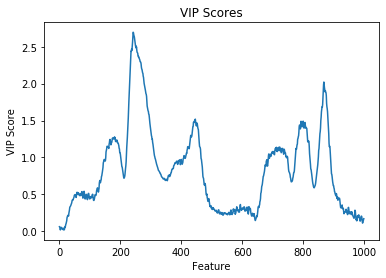

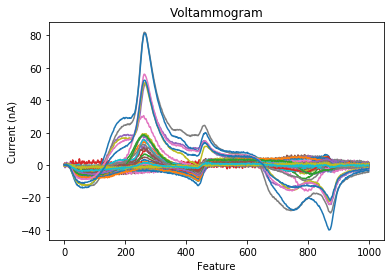

Number Features with VIP > or = 1: 343


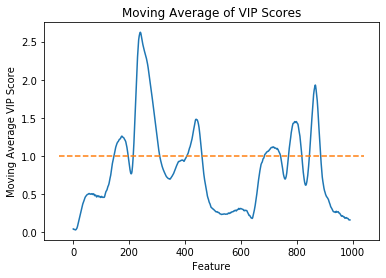

In [47]:
if modelChoice == 'PLSR':
    PLSRmodel=PLSRegression(n_components=nComponents,scale=False) #TODO
    PLSRmodel.fit_transform(X,y)
    vipPLSR = vip(PLSRmodel)
    plt.plot(vip(PLSRmodel))
    plt.xlabel("Feature")
    plt.ylabel('VIP Score')
    plt.title('VIP Scores')
    plt.show()
    plt.plot(df_RPV)
    plt.xlabel("Feature")
    plt.ylabel('Current (nA)')
    plt.title('Voltammogram')
    plt.show()

    countOver1 = 0
    for i in range(len(vipPLSR)):
        if vipPLSR[i] >= 1:
            countOver1 += 1

    print('Number Features with VIP > or = 1:',countOver1)

    plt.plot(moving_average(vipPLSR,n=10))
    plt.xlabel("Feature")
    plt.ylabel('Moving Average VIP Score')
    plt.title('Moving Average of VIP Scores')
    abline(0,1)

In [48]:
for modelChoice in [PLSRegression(scale=False),[PCA(), LinearRegression()]]:
    for preProcessor in []

SyntaxError: invalid syntax (<ipython-input-48-66b6c082e35f>, line 2)

In [49]:
for modelChoice in ['PCR','PLSR']:
    
    for preProcess in ['No Scale','Scale Features', 'Scale Samples', 
                       'l1 Normalize Features', 'l2 Normalize Features', 'max Normalize Features',
                       'l1 Normalize Samples', 'l2 Normalize Samples', 'max Normalize Samples']:
        
        if preProcess == 'Scale Features' and modelChoice == 'PLSR': 
            param_grid = [
            {'plsregression__n_components': range(len(df_RPV_T[2:20])),'standardscaler__with_mean': [True,False],
             'standardscaler__with_std': [True,False]}]
            
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_ScaleFeatures, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_ScaleFeatures, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)

        if preProcess == 'Scale Features' and modelChoice == 'PCR':
            param_grid = [
            {'pca__n_components': range(len(df_RPV_T[2:20])),'standardscaler__with_mean': [True,False],
             'standardscaler__with_std': [True,False]}]
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_ScaleFeatures, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_ScaleFeatures, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)
            
        if preProcess == 'No Scale' and modelChoice == 'PLSR':
            param_grid = [
            {'plsregression__n_components': range(len(df_RPV_T[2:20]))}]
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_NoScale, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_NoScale, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)
            
        if preProcess == 'No Scale' and modelChoice == 'PCR':
            param_grid = [
            {'pca__n_components': range(len(df_RPV_T[2:10])),'linearregression__normalize':[True,False]}] 
            
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_NoScale, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_NoScale, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)

        if preProcess == 'Scale Samples' and modelChoice == 'PLSR':
            param_grid = [
            {'plsregression__n_components': range(len(df_RPV_T[2:10])), 'plsregression__scale':[True, False]}]
            
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_ScaleSamples, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_ScaleSamples, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)

        if preProcess == 'Scale Samples' and modelChoice == 'PCR':
            param_grid = [
            {'pca__n_components': range(len(df_RPV_T[2:10])), 'linearregression__normalize':[True, False]}]
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_ScaleSamples, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_ScaleSamples, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)

        if preProcess == 'l2 Normalize Features' and modelChoice == 'PLSR':

            param_grid = [
            {'plsregression__n_components': range(len(df_RPV_T[2:10])),'normalizer__norm': ['l1', 'l2', 'max']}]
            
            if modelChoice == 'PLSR':
                GSmodel = make_pipeline(preProcesser_l2_Normalize_Features, PLSRegression(scale=False)) 
            if modelChoice == 'PCR':
                GSmodel = make_pipeline(preProcesser_ScaleSamples, PCA(), LinearRegression())

            grid_search = GridSearchCV(GSmodel, param_grid, cv=cvFolds,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

            grid_search.fit(X,y);

            print(grid_search.best_params_, grid_search.best_estimator_)
        if preProcess == 'Normalize' and modelChoice == 'PCR':
            for myNorm in 
            param_grid = [
            {'pca__n_components': range(len(df_RPV_T[2:10])),'normalizer__norm': ['l1', 'l2', 'max']}]
        

SyntaxError: invalid syntax (<ipython-input-49-d0253eb5f65c>, line 126)

In [50]:
    cvFold=len(df_RPV_T)
    i_values = np.arange(1,11)
    CV_var_exp_DA = np.zeros(len(i_values))
    CV_var_exp_HT = np.zeros(len(i_values))
    CV_var_exp_All = np.zeros(len(i_values))
    print(cvFold)
    for i in (i_values):
        print(i)
        if modelChoice == 'PLSR':
            myModel = make_pipeline(preProcesser, PLSRegression(n_components=i,scale=False))
        if modelChoice == 'PCR':
            myModel = make_pipeline(preProcesser, PCA(n_components=i), LinearRegression())  
        y_train_pred = cross_val_predict(myModel, X_raw, y, cv=cvFold)
        CV_var_exp_DA[i-1] = r2_score(y_DA,y_train_pred[:,0])
        CV_var_exp_HT[i-1] = r2_score(y_5HT,y_train_pred[:,1])
        CV_var_exp_All[i-1] = r2_score(y,y_train_pred)
    df_CV_var_exp_All=pd.DataFrame({"Number Components": i_values, 
                                    "Variance Explained (%), All CV": np.round(100*CV_var_exp_All,2)})
    if cvFold == 18:   
        df_CV_var_exp_All.to_pickle('df_CV_var_exp_All_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName
                                    +'_'+str(nComponents)+'_comp'+str(cvFold)+'folds')
    print(df_CV_var_exp_All,'\n');
    df_CV_var_exp_DA=pd.DataFrame({"Number Components": i_values, "Variance Explained (%), DA CV": np.round(100*CV_var_exp_DA,2)})
    if cvFold == 18:
        df_CV_var_exp_DA.to_pickle('df_CV_var_exp_DA_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName
                                    +'_'+str(nComponents)+'_comp'+str(cvFold)+'folds')
    print(df_CV_var_exp_DA,'\n');
    df_CV_var_exp_HT=pd.DataFrame({"Number Components": i_values, "Variance Explained (%), HT CV": np.round(100*CV_var_exp_HT,2)})
    if cvFold == 18:
        df_CV_var_exp_HT.to_pickle('df_CV_var_exp_HT_'+modelChoice+'_'+preProcess+'_'+myNorm+'_'+sheetName
                                    +'_'+str(nComponents)+'_comp'+str(cvFold)+'folds')
    print(df_CV_var_exp_HT);
    plt.plot(i_values,CV_var_exp_All,label='All CV');
    plt.plot(i_values,CV_var_exp_HT,label="HT CV");
    plt.plot(i_values,CV_var_exp_DA,label='DA CV');
    plt.legend()
    plt.title("Variance Explained by N Components during "+str(cvFold)+" Fold CV");
    plt.xlabel("Number Components");
    plt.ylabel("Variance Explained");
    plt.show()

51
1


NameError: name 'preProcesser' is not defined

In [32]:
plt.plot(i_values,CV_var_exp_All,label='Q2Y',linewidth=3,linestyle='dashed',marker='o');
print(i_values)
print(CV_var_exp_All)
print(var_exp_All)
plt.plot(i_values,var_exp_All[0:10],label='R2Y',linewidth=3,marker='^');
plt.legend(loc=4,fontsize='large')
plt.xticks([1,5,10,15,20],fontsize=12)
plt.xlabel("Number Components",fontsize=15);
plt.ylabel("Variance Explained",fontsize=15);
plt.yticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.show()

NameError: name 'i_values' is not defined

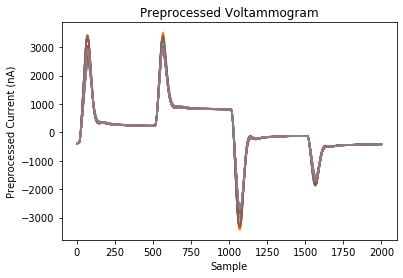

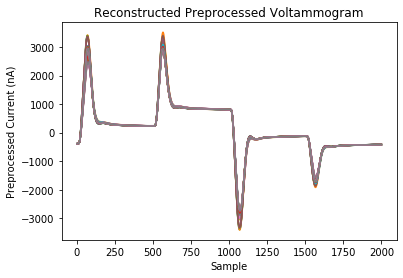

Reconstruction Error (%): 22.86


In [33]:
#R2X
if modelChoice == 'PCR':
    pca = PCA(n_components=nComponents);
    X_reduced = pca.fit_transform(X);
    X_recovered = pca.inverse_transform(X_reduced);
    
if modelChoice == 'PLSR':
    plsr = PLSRegression(n_components=nComponents,scale=False);
    X_reduced = plsr.fit_transform(X,y);
    X_recovered = plsr.inverse_transform(plsr.x_scores_);
    
plt.plot(X.T);
plt.xlabel('Sample')
plt.ylabel('Preprocessed Current (nA)')
plt.title('Preprocessed Voltammogram')
plt.show();
plt.plot((X_recovered).T);
plt.xlabel('Sample')
plt.ylabel('Preprocessed Current (nA)')
plt.title('Reconstructed Preprocessed Voltammogram')
plt.show()

if preProcess != 'Normalize':
    plt.plot((preProcesser.inverse_transform(X)).T);
    plt.xlabel('Sample')
    plt.ylabel('Current (nA)')
    plt.title('Voltammogram')
    plt.show();
    plt.plot((preProcesser.inverse_transform(X_recovered)).T);
    plt.xlabel('Sample')
    plt.ylabel('Current (nA)')
    plt.title('Reconstructed Voltammogram')
    plt.show()

print("Reconstruction Error (%):", 100*round(1-r2_score(X,X_recovered),4))

    Predicted DA  Actual DA  Predicted 5HT  Actual 5HT
0         102.31        0.0         -77.23        0.00
1         116.21        0.0         -44.97        1.00
2         100.20        0.0         -25.16       10.00
3          11.44        0.0          87.33      100.00
4         175.52        0.0         826.53     1000.00
5         182.50        0.0          23.35        0.00
6          51.47        1.0        -104.36        0.00
7         165.13       10.0          30.70        0.00
8         217.00      100.0          18.46        0.00
9         684.62     1000.0           9.77        0.00
10          1.91        0.0         119.92        0.00
11         24.46       50.0         129.23       50.00
12        132.84      666.0          86.90        3.33
13         22.39       33.3          77.53       66.60
14        -61.51        0.0          18.19        0.00
15        -13.05        0.0           9.52        1.00
16        -50.19        0.0          34.13       10.00
17        

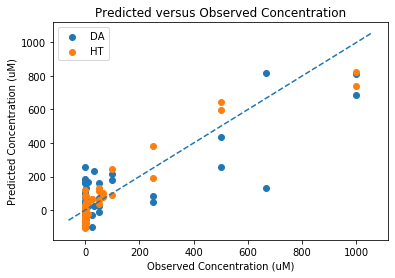

In [51]:
nComponents=6
if modelChoice == 'PLSR':
    myModel = make_pipeline(preProcesser, PLSRegression(n_components=nComponents,scale=False))
    myModel.fit_transform(X, y)
if modelChoice == 'PCR':
    myModel = make_pipeline(preProcesser, PCA(n_components=nComponents), LinearRegression()) 
    myModel.fit(X, y)

#R2Y
if modelChoice =='PCR':
    myModel.fit(X_raw,y)
if modelChoice =='PLSR':
    myModel.fit_transform(X_raw,y)
y_pred = myModel.predict(X_raw)
df_PredConc=pd.DataFrame({"Predicted DA": np.round(y_pred[:,0],2),'Actual DA':np.round(y[:,0],2),
                     "Predicted 5HT": np.round(y_pred[:,1],2),'Actual 5HT':np.round(y[:,1],2)})
print(df_PredConc)

r2_score_DA = r2_score(y_DA,y_pred[:,0],multioutput='raw_values')
r2_score_5HT = r2_score(y_5HT,y_pred[:,1],multioutput='raw_values')
print('R2Y DA:',(100*np.round(r2_score_DA,4)))
print('R2Y 5HT:', (100*np.round(r2_score_5HT,4)))
print('R2Y All:',100*np.round(r2_score(y,y_pred),4))

plt.scatter(df_ConcAll["DA"],y_pred[:,0], label="DA");
plt.scatter(df_ConcAll["HT"],y_pred[:,1], label="HT");
plt.xlabel('Observed Concentration (uM)')
plt.ylabel('Predicted Concentration (uM)')
plt.title("Predicted versus Observed Concentration")
abline(1,0)
plt.plot();
plt.legend();

#debug code
R2Y_DA = 1-(np.sum((y_pred[:,0]-y_DA)**2))/(np.sum((y_DA-np.mean(y_DA))**2))
R2Y_5HT = 1-(np.sum((y_pred[:,1]-y_5HT)**2))/(np.sum((y_5HT-np.mean(y_5HT))**2))
assert R2Y_DA == r2_score_DA
assert R2Y_5HT == r2_score_5HT

In [34]:
xScores=(myModel['plsregression'].x_scores_)
yScores=(myModel['plsregression'].y_scores_)

plt.figure(figsize=(20,20))
for i in range(len(X)):
    plt.scatter(xScores[i][0],xScores[i][1],label=list_Samples[i],color=cmap_electrode[finalDf.get_value(i,"Sample")])
    plt.annotate(list_Samples[i],(xScores[i][0],xScores[i][1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

plt.figure(figsize=(20,20))
for i in range(len(X)):
    plt.scatter(yScores[i][0],yScores[i][1],color=cmap_electrode[finalDf.get_value(i,"Sample")])
    plt.annotate(list_Samples[i],(yScores[i][0],yScores[i][1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

NameError: name 'myModel' is not defined